#1. 데이터 수집하기
* 1975-2024년 자장면 물가지수
* 2020년 자장면 재료 가격

1.1 데이터 수집하기

In [ ]:
# 파일업로드
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.2 데이터프레임에 저장하기

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/School_AI Study/250108/실습/자장면 재료 별 물가지수.csv')
df.head()

,연도,양파,돼지고기,밀가루,자장면
0,1975,6.079,8.361,9.754,2.894
1,1976,7.141,10.893,10.368,3.193
2,1977,5.421,11.235,10.145,4.078
3,1978,11.372,15.103,9.961,4.277
4,1979,11.324,14.592,10.503,5.823


#2 데이터 탐색과 전처리하기
2.1 데이터 둘러보기

In [ ]:
#데이터 속성 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      50 non-null     int64  
 1   양파      50 non-null     float64
 2   돼지고기    50 non-null     float64
 3   밀가루     50 non-null     float64
 4   자장면     50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [ ]:
#물가지수 통계 값 확인하기
df.describe()

,연도,양파,돼지고기,밀가루,자장면
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,1999.50000,50.086340,53.796640,55.290080,51.178120
std,14.57738,31.688389,32.755583,39.198514,35.724715
min,1975.00000,5.421000,8.361000,9.754000,2.894000
25%,1987.25000,20.975500,28.746750,20.221750,14.561750
50%,1999.50000,42.448500,39.827000,43.873000,50.475500
75%,2011.75000,72.563000,80.452750,98.825250,80.706000
max,2024.00000,110.109000,120.570000,138.050000,126.380000


#2.2 데이터 전처리하기



In [ ]:
# 2020년도 자장면 재료 가격
price2020=[3734, 2473, 1356, 5195]   #양파, 돼지고기(목살), 밀가루, 자장면 가격

자장면 재료별 물가지수를 가격 데이터로 변환

In [ ]:
df['[가격]양파']=round(df['양파']*price2020[0]/100,2)
df['[가격]돼지고기']=round(df['돼지고기']*price2020[1]/100,2)
df['[가격]밀가루']=round(df['밀가루']*price2020[2]/100,2)
df['[가격]자장면']=round(df['자장면']*price2020[3]/100,2)

In [ ]:
# 자장면 재료 가격 확인하기
df[41:48]              # 2020년 기준년도의 소비자 물가지수는 100이다

,연도,양파,돼지고기,밀가루,자장면,[가격]양파,[가격]돼지고기,[가격]밀가루,[가격]자장면
41,2016,93.144,91.841,99.484,88.108,3478.00,2271.23,1349.00,4577.21
42,2017,100.359,97.522,98.352,90.933,3747.41,2411.72,1333.65,4723.97
43,2018,80.856,93.981,99.398,94.982,3019.16,2324.15,1347.84,4934.31
44,2019,68.748,90.311,101.074,98.589,2567.05,2233.39,1370.56,5121.70
45,2020,100.000,100.000,100.000,100.000,3734.00,2473.00,1356.00,5195.00
46,2021,103.560,111.110,100.670,103.070,3866.93,2747.75,1365.09,5354.49
47,2022,94.420,120.090,128.830,114.200,3525.64,2969.83,1746.93,5932.69


#2.3 탐색적 데이터 분석하기

In [ ]:
df2=df.iloc[:,[0,5,6,7,8]]
df2.head()

,연도,[가격]양파,[가격]돼지고기,[가격]밀가루,[가격]자장면
0,1975,226.99,206.77,132.26,150.34
1,1976,266.64,269.38,140.59,165.88
2,1977,202.42,277.84,137.57,211.85
3,1978,424.63,373.50,135.07,222.19
4,1979,422.84,360.86,142.42,302.50


In [ ]:
#속성간 상관관계 출력
df2.corr()

,연도,[가격]양파,[가격]돼지고기,[가격]밀가루,[가격]자장면
연도,1.000000,0.952001,0.960595,0.953717,0.989907
[가격]양파,0.952001,1.000000,0.945140,0.938066,0.954413
[가격]돼지고기,0.960595,0.945140,1.000000,0.973867,0.970882
[가격]밀가루,0.953717,0.938066,0.973867,1.000000,0.971659
[가격]자장면,0.989907,0.954413,0.970882,0.971659,1.000000


In [ ]:
#한글 라이브러리 설치하기
!pip install koreanize-matplotlib

<Axes: >

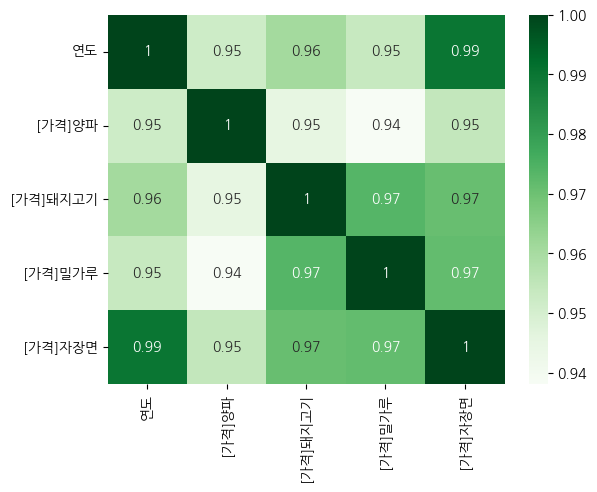

In [ ]:
#히트맵으로 상관관계 시각화하기
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df2.corr(),annot=True, cmap='Greens')   #히트맵 출력

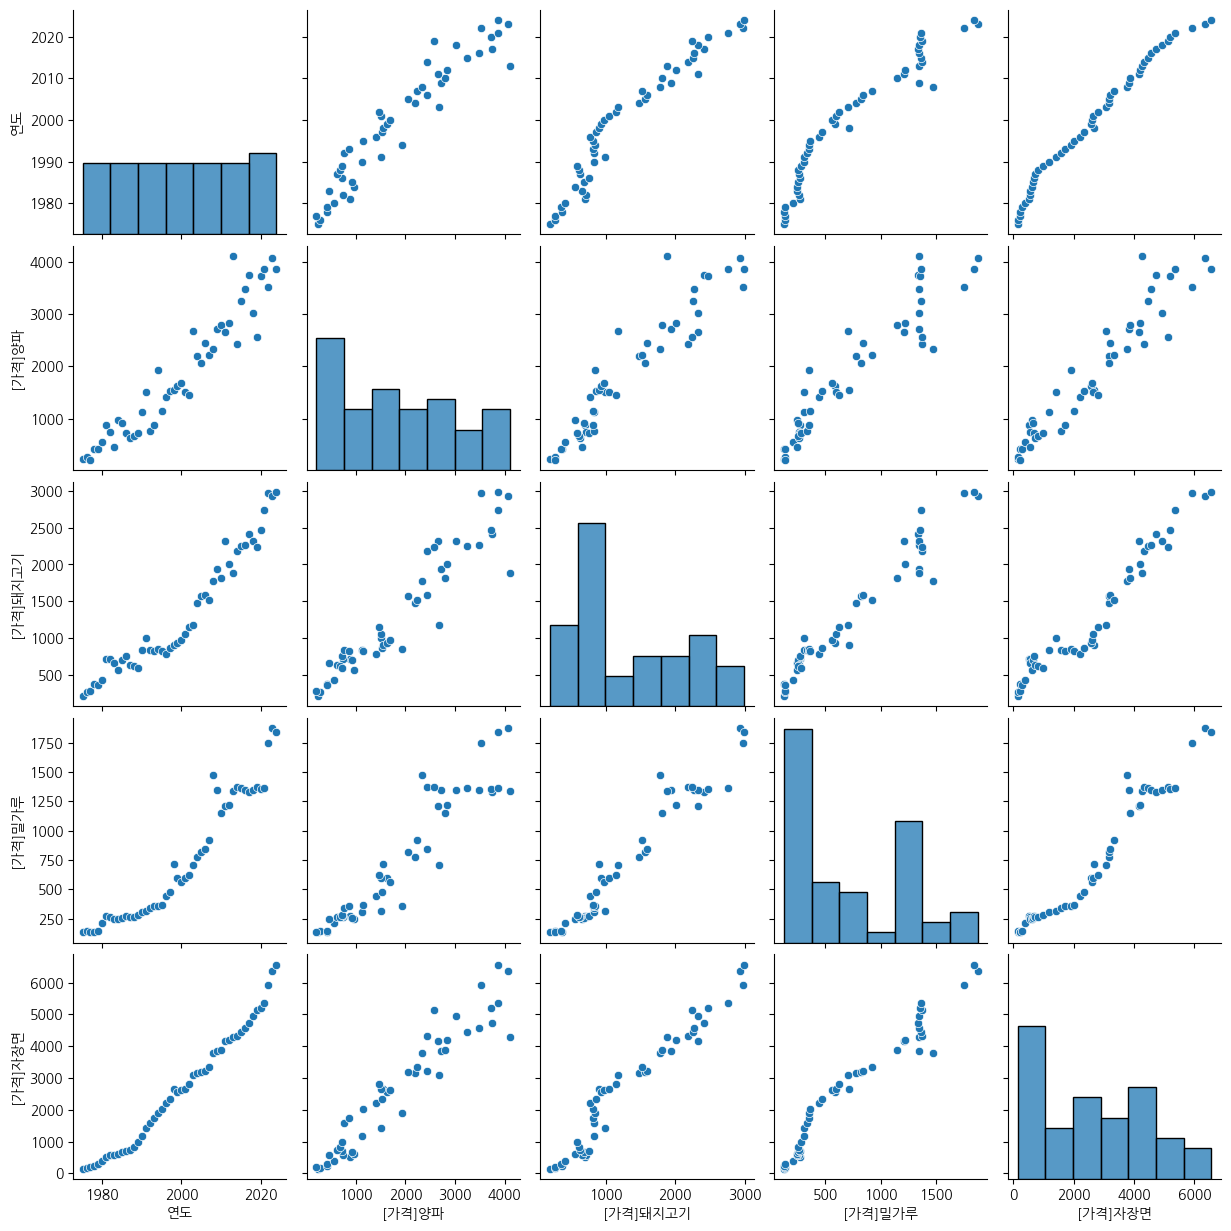

In [ ]:
# pairplot으로 시각화하기
sns.pairplot(df2)

2.4 독립변수와 종속변수 선정하기

In [ ]:

X=df2.iloc[:,0:4]   # 자장면 재료 가격 데이터를 X에 저장
y=df2.iloc[:,4]     # 자장면 가격 데이터를 y데이터에 저장
X.head()

,연도,[가격]양파,[가격]돼지고기,[가격]밀가루
0,1975,226.99,206.77,132.26
1,1976,266.64,269.38,140.59
2,1977,202.42,277.84,137.57
3,1978,424.63,373.50,135.07
4,1979,422.84,360.86,142.42


#2.5 훈련 데이터와 테스트 데이터 분할하기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

#3.모델 생성하기
3.1 모델 학습하기

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
""" from sklearn.neighbors import KNeighborsRegressor
 model= KNeighborsRegressor()
 model.fit(X_train, y_train)"""

' from sklearn.neighbors import KNeighborsRegressor\n model= KNeighborsRegressor()\n model.fit(X_train, y_train)'

In [ ]:
"""from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X_train, y_train)"""

'from sklearn.ensemble import GradientBoostingRegressor\nmodel= GradientBoostingRegressor()\nmodel.fit(X_train, y_train)'

In [ ]:
"""from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\nscaler.fit(X_train)\nX_train=scaler.transform(X_train)\nX_test=scaler.transform(X_test)'

In [ ]:
"""from sklearn.linear_model import SGDRegressor
model= SGDRegressor(max_iter=100)
model.fit(X_train, y_train)"""

'from sklearn.linear_model import SGDRegressor\nmodel= SGDRegressor(max_iter=100)\nmodel.fit(X_train, y_train)'

3.2 회귀계수와 절편 확인하기

In [ ]:
print(model.coef_, model.intercept_)   # coef_ : 회귀계수, intercept_ : 절편

[ 9.33692140e+01 -7.79335452e-02  1.36602996e-01  8.72675290e-01] -184712.74044405398


In [ ]:
for i in range(4):
  print("w%d = %.3f"%(i+1,model.coef_[i]))
print("b = %.3f"%(model.intercept_))

w1 = 93.369
w2 = -0.078
w3 = 0.137
w4 = 0.873
b = -184712.740


연도를 x1, 양파 가격을 x2, 돼지고기 가격을 x3, 밀가루 가격을 x4라고 할 때 자장면 가격(y)를 예측하는 모델의 식은 다음과 같다.

$$ y= 90.524x_{1}-0.052x_{2} -0.014x_{3} + 1.114x_{3}-179072.911 $$





3.3 모델 성능 확인하기

In [ ]:
print('훈련 데이터로 학습한 모델의 성능(R2):', model.score(X_train, y_train))

훈련 데이터로 학습한 모델의 성능(R2): 0.9883839521146456


# 4. 모델 평가 및 예측하기

4.1 모델 성능 평가하기

In [ ]:
# 테스트 데이터로 모델 성능 평가
print('테스트 데이터로 모델의 성능(R2) 평가:', model.score(X_test, y_test))

테스트 데이터로 모델의 성능(R2) 평가: 0.9864850217748955



* mean_absolute_error 오차들의 절댓값 합  
* mean_squared_error 오차제곱들의 합  
* r2_score 결정계수

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred=model.predict(X_test)
import math

print('Mean squared error :', math.sqrt(mean_squared_error(y_pred, y_test)))
print('Mean absolute error :', mean_absolute_error(y_pred, y_test))
print('R2 score : ', r2_score(y_pred, y_test))

Mean squared error : 213.1374660538134
Mean absolute error : 169.24389880115686
R2 score :  0.9854917024238214


4.2 모델 예측하기

In [ ]:
y_pred=model.predict(X_test)
print('실제값:')
print(y_test[:5])
print('예측값:', y_pred[:5])

실제값:
13     824.86
39    4332.47
30    3172.38
45    5195.00
17    1596.27
Name: [가격]자장면, dtype: float64
예측값: [1164.05842441 4641.96222004 3263.86410843 5123.23494389 1633.07853611]


#5. 모델 활용 문제해결하기

새로운 데이터 불러오기

In [ ]:
df_new=pd.read_csv('/content/drive/MyDrive/School_AI Study/250108/실습/향후 30년 간 자장면 재료 별 예상 가격.csv')
df_new

,연도,[가격]양파,[가격]돼지고기,[가격]밀가루
0,2030,4227.08,2958.45,1810.38
1,2040,4999.82,3492.24,2158.13
2,2050,5772.55,4026.03,2505.88


In [ ]:
predictions = model.predict(df_new)
for i in predictions:
    print(f"%.2f 원" % i)

6481.34 원
7731.20 원
8981.06 원
